In [73]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import random
import scipy.optimize as op

In [3]:
data = loadmat('data/ex3data1.mat')
x = data['X']
y = data['y']

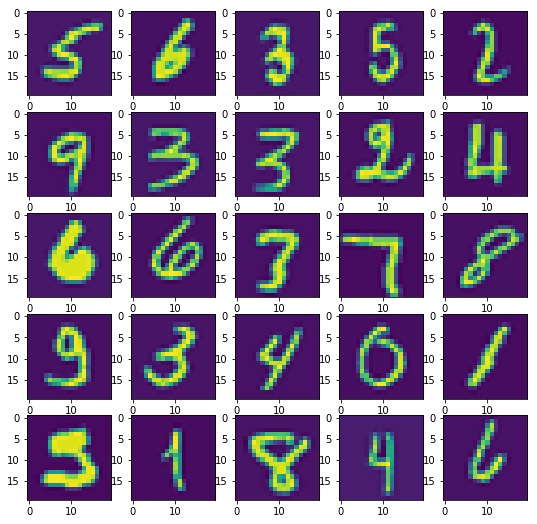

In [179]:
fig, axes = plt.subplots(5, 5, figsize=(9, 9))
for i, r in enumerate(random.sample(range(0, 5000), 25)):
    axes.flatten()[i].imshow(x[r].reshape(20, 20).T, interpolation='nearest')

In [167]:
data2 = loadmat('data/ex4weights.mat')
theta1 = data2['Theta1']
theta2 = data2['Theta2']
print(theta1.shape, theta2.shape)

(25, 401) (10, 26)


In [169]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [170]:
# Cost function

"""
    pd.get_dummies(DataFrame(m x 1)
    converts multi-class data into (m x k) matrix
"""
 
def cost(theta, x, y, reg=0): 
    y_matrix = pd.get_dummies(y.ravel()).values
    a1 = np.c_[np.ones((x.shape[0],1)),x]
    
    theta1 = theta[0:25*401].reshape(25,401)
    theta2 = theta[25*401:].reshape(10,26)
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    a2 = np.c_[np.ones((a2.shape[0],1)), a2]
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    m = x.shape[0]
    j = 1/m * np.sum(-(np.log(a3)*y_matrix)-(np.log(1-a3)*(1-y_matrix)))    \
        + reg/(2*m) * (np.sum( np.square(theta1[:,1:]) )+np.sum(np.square(theta2[:,1:])))
    
    return j

theta = np.append(theta1,theta2).ravel().reshape(-1,1)
print(cost(theta, x, y, ))
print(cost(theta, x, y,1))

0.2876291651613189
0.38376985909092365


In [171]:
def backpropagate(theta, x, y, reg=0):
    y_matrix = pd.get_dummies(y.ravel()).values
    a1 = np.c_[np.ones((x.shape[0],1)),x]
    
    theta1 = theta[0:25*401].reshape(25,401)
    theta2 = theta[25*401:].reshape(10,26)
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    a2 = np.c_[np.ones((a2.shape[0],1)), a2]
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    m = x.shape[0]
    
    d3 = a3-y_matrix
    d2 = theta2[:,1:].T.dot(d3.T)*sigmoid_gradient(z2.T)
    
    """
        Have no idea 
        1) why delta2, delta1 is always 0
        2) d3 needs to be transposed, but not d2
    """
    
    delta1 = 0
    delta2 = 0
    delta2 = delta2 + d3.T.dot(a2)  
    delta1 = delta1 + d2.dot(a1)
    
    theta1_grad = delta1/m + (theta1*reg)/m
    theta2_grad = delta2/m + (theta2*reg)/m
    
    return np.append(theta1_grad,theta2_grad).ravel()

In [172]:
"""
    theta unrolling doesn't matter.
    two ways to unroll
        1) np.r[theta1.ravel(), theta2.ravel()]
        2) np.append(theta1, theta2).ravel()
        
    both needs reshaping
"""

params = np.r_[theta1.ravel(), theta2.ravel()]
params.shape

aa = params[0:25*401].reshape(25,401)
aa.shape, theta1.shape
aa==theta1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [173]:
def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))


sigmoid_gradient(0)

0.25

In [196]:
"""
    epsilon init = sqrt(6)/sqrt( input + output layer )
"""

epsilon1 = np.sqrt(6)/(np.sqrt(400+25))
epsilon2 = np.sqrt(6)/(np.sqrt(25+10))

back_theta1 = np.random.rand(25, 401)*2*epsilon1 - epsilon1
back_theta2 = np.random.rand(10, 26)*2*epsilon2 - epsilon2

back_theta = np.append(back_theta1,back_theta2).ravel().reshape(-1,1)

In [202]:
"""
    gradient checking checks with one row,
    check difference between 
    J(theta + eps) - J(theta - eps) / 2 *eps
    
    TODO...
        thetap[val]+=epsilon 이 아니라, 
        reshape 한 뒤에 한 row 기준으로 더하고 빼면서 계산해야됨 
    
"""

# def gradient_checking(theta, x, y, epsilon=0.001):
#     for i, val in enumerate([0, 100, 2000, 10121]):
#         thetap = theta
#         thetam = theta
#         thetap[val]+=epsilon
#         thetam[val]-=epsilon
#         print('{}: {} {}'.format(i, cost(thetap,x,y,)-cost(thetam,x,y,)/2*epsilon, cost(theta,x,y,) ))
# 
#  
# gradient_checking(theta, x, y, 0.001)

'\n    gradient checking checks with one row,\n    check difference between \n    J(theta + eps) - J(theta - eps) / 2 *eps\n    \n    TODO...\n        thetap[val]+=epsilon 이 아니라, \n        reshape 한 뒤에 한 row 기준으로 더하고 빼면서 계산해야됨 \n    \n'

In [175]:
"""
    Computing Back Propagation
"""

xt = x[:1]    # 1,400  
yt = y[:1]    # 1 x 10 (0 값)

cost(back_theta, xt, yt, 0)

7.2999210918991055

In [160]:
"""
    calculating learned_theta with 
    fmin_cg, backpropagate, initial theta, cost function
"""

result = op.fmin_cg(cost, x0=back_theta, fprime=backpropagate, \
args=(x,y,1),maxiter=200,disp=True,full_output=True)
                    
learned_theta = result[0]
learned_theta1 = result[0][:25*401].reshape(25,401)
learned_theta2 = result[0][25*401:].reshape(10,26)

         Current function value: 0.334550
         Iterations: 200
         Function evaluations: 454
         Gradient evaluations: 454


In [176]:
"""
    propagate returns a3(output layer)
"""

def propagate(theta, x):
    a1 = np.c_[np.ones((x.shape[0],1)),x]
    
    theta1 = theta[0:25*401].reshape(25,401)
    theta2 = theta[25*401:].reshape(10,26)
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    a2 = np.c_[np.ones((a2.shape[0],1)), a2]
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return a3
    
    
def predict(output):
    return (np.argmax(output, axis=1)+1)%10


predict_nn = predict(propagate(learned_theta, x))
print('Prediction Accuracy {}%'.format(np.mean(predict_nn == y.ravel()) * 100))

Prediction Accuracy 89.25999999999999%


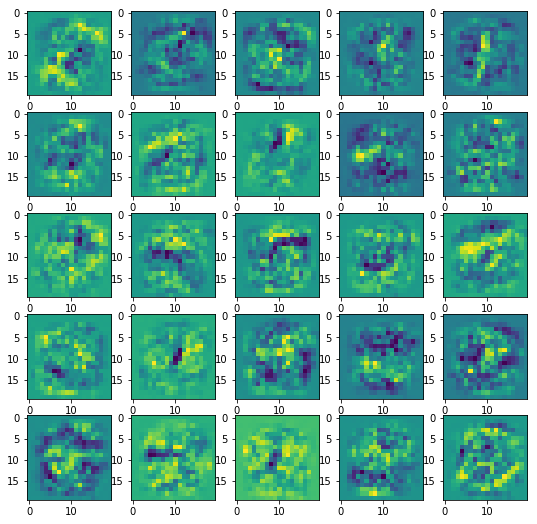

In [180]:
"""
    Plotting Hidden layer
"""

hidden = learned_theta1[:,1:]

fig, axes = plt.subplots(5, 5, figsize=(9, 9))
for i, layer in enumerate(hidden):
    axes.flatten()[i].imshow(layer.reshape(20, 20).T, 
                             interpolation='nearest')